In [145]:
import pandas as pd
data = pd.read_csv("/Users/emily/Desktop/A_Z Handwritten Data.csv")

In [146]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

print(data.head())

X = data.drop('0', axis = 1)
y = data['0']



   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [147]:
import torchvision.transforms as transforms
import torch
from torch import nn
import torch.nn.functional as F

In [148]:
alphabet_counter = np.zeros(26, dtype='int')
alphabet_counter
y_int = np.int0(y)
y_int = np.int0(y)
for i in y_int:
    alphabet_counter[i] += 1
alphabet_counter


array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [149]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [150]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [151]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

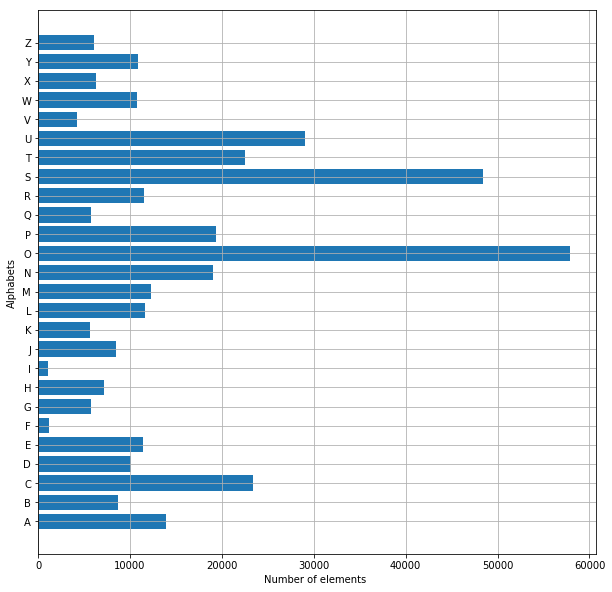

In [152]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, alphabet_counter)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

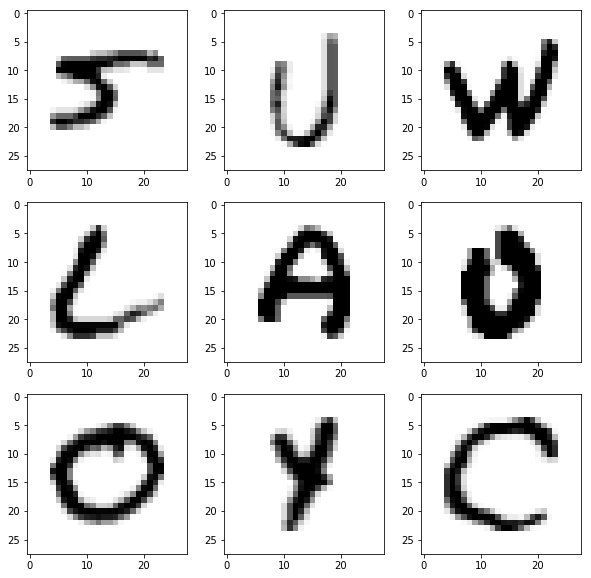

In [153]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
   # _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(train_x[i], (28,28)), cmap="Greys")
plt.show()

In [154]:
torch_train_x = []
for i in range(len(train_x)):
    torch_train_x.append(torch.from_numpy(train_x[i]))

In [155]:
#print(torch_train_x[:10])
d = {}
for i in range(256):
    d[str(i)]=0
for e in train_x[:20]:
    for ee in e:
        #ca = np.bincount(ee)
        for i in range(255):
            d[str(i)]+=ee.tolist().count(i)

{'0': 11903, '1': 14, '2': 16, '3': 16, '4': 14, '5': 11, '6': 20, '7': 17, '8': 19, '9': 12, '10': 28, '11': 8, '12': 13, '13': 15, '14': 12, '15': 18, '16': 17, '17': 9, '18': 16, '19': 8, '20': 12, '21': 19, '22': 8, '23': 16, '24': 17, '25': 9, '26': 4, '27': 5, '28': 5, '29': 7, '30': 6, '31': 15, '32': 8, '33': 10, '34': 12, '35': 7, '36': 5, '37': 11, '38': 7, '39': 9, '40': 15, '41': 4, '42': 10, '43': 4, '44': 15, '45': 9, '46': 10, '47': 16, '48': 5, '49': 8, '50': 12, '51': 16, '52': 14, '53': 6, '54': 21, '55': 7, '56': 10, '57': 11, '58': 4, '59': 9, '60': 5, '61': 13, '62': 5, '63': 15, '64': 10, '65': 5, '66': 9, '67': 10, '68': 13, '69': 4, '70': 16, '71': 6, '72': 7, '73': 10, '74': 11, '75': 10, '76': 8, '77': 6, '78': 9, '79': 6, '80': 13, '81': 14, '82': 6, '83': 9, '84': 9, '85': 8, '86': 5, '87': 7, '88': 3, '89': 5, '90': 11, '91': 9, '92': 8, '93': 6, '94': 2, '95': 11, '96': 6, '97': 2, '98': 12, '99': 6, '100': 7, '101': 8, '102': 19, '103': 6, '104': 9, '105'

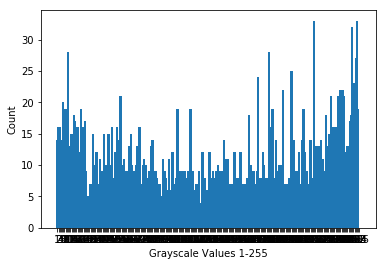

In [156]:
print(d)
d.pop('0')
plt.bar(d.keys(),d.values(),2)
plt.xlabel("Grayscale Values 1-255")
plt.ylabel("Count")
plt.show()

In [157]:
train_X = torch.from_numpy(train_x)


In [158]:
train_X.shape

torch.Size([297960, 28, 28])

In [159]:
input_size = 784
output_size = 10

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 26),
            nn.LogSoftmax(dim=0)
        )
  
    def forward(self, x):
        #x = self.flatten(x)
        #print(x.shape)
        logits = self.linear_relu_stack(x)
        return logits

    

In [97]:
from torch import optim

model = Model()

##model.float / model.double 

loss_fn = nn.CrossEntropyLoss()
epoch = 1;

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_Y = torch.from_numpy(train_y.values).to(dtype=torch.long)

def train(epoch):
    for inp, target in zip(train_X, train_Y):
        inpt = inp.view(28*28).to(dtype=torch.float)
        optimizer.zero_grad()
        prediction = model(inpt)
        loss = loss_fn(prediction, target)
        loss.backward()
        optimizer.step()

train(0)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [18]:
def test():
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for inp, target in zip(test_X, test_Y):
            output = model(inp)
            test_loss += F.loss_fn(output, target)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_Y)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( test_loss, correct, len(test_Y),100. * correct / len(test_Y)))

In [98]:
m = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 26),
            nn.LogSoftmax(dim=0)
        )
m(train_X[0].view(28*28).to(dtype=torch.float))

tensor([ -1.1884, -10.6282,  -2.2025,  -2.4715,  -8.6472,  -6.3975, -11.3196,
        -20.9648,  -7.5294,  -6.4704,  -8.5132,  -6.5403,  -0.7496,  -8.8443,
         -4.9768,  -6.8990, -14.5105, -18.5305,  -7.5294, -13.5879, -12.0561,
        -14.8666,  -6.1374, -13.1789,  -4.4778, -17.9026],
       grad_fn=<LogSoftmaxBackward>)

In [170]:
input_size = 784
output_size = 10

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
        self.linear_relu_stack_1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout2d(),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.linear_relu_stack_2 = nn.Sequential(
            #reshshape
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 26),
            nn.LogSoftmax()
        )

    def forward(self, x):
        logits = self.linear_relu_stack_1(x)
        logits1 = logits.view(-1, 320)
        logits2 = self.linear_relu_stack_2(logits1)
        return logits2
        """x = nn.ReLU(nn.max_pool2d(self.conv1(x), 2))
        x = nn.ReLU(nn.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.ReLU(self.fc1(x))
        x = nn.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)"""


    

In [171]:
#### write print statements for loss
epochs = 40
batch_size = 64
train_X = torch.from_numpy(train_x)
train_X_resized = train_X.unsqueeze(1).to(dtype=torch.float)

model = Model()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_Y = torch.from_numpy(train_y.values).to(dtype=torch.long)

loss_fn = nn.CrossEntropyLoss()
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_x) for i in range(epochs + 1)]
log_interval = 2*batch_size

#for epoch in range(epochs):
def train(epoch):
    permutation = torch.randperm(train_X.size()[0])
    for i in range(0, train_X.size()[0], batch_size):
        optimizer.zero_grad()
        indices = permutation[i: i+batch_size]
        batch_x, batch_y = train_X_resized[indices], train_Y[indices]
        
        prediction = model(batch_x)
        loss = loss_fn(prediction, batch_y)
        loss.backward()
        optimizer.step()
        
        if i % log_interval == 0:
            """print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch+1, i, len(train_x), 100. * i / len(train_x), loss.item()))"""
            train_losses.append(loss.item())
            train_counter.append((i*64) + ((epoch-1)*len(train_x)))
    

In [172]:
#### write test function + printing accuracy/loss
test_X=torch.from_numpy(test_x)
test_X_resized = test_X.unsqueeze(1).to(dtype=torch.float)
test_X_resized = test_X_resized.unsqueeze(1).to(dtype=torch.float)

test_Y=torch.tensor(test_y.values)
test_losses=[]
test_counter = [i for i in range(epochs + 1)]
def test():
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for inp, target in zip(test_X_resized, test_Y):
            output = model(inp)
            #print(output.shape, target.shape)
            test_loss += loss_fn(output, target.unsqueeze(0))
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_Y)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( test_loss, correct, len(test_Y),100. * correct / len(test_Y)))

In [173]:
test()
for epoch in range(1, epochs + 1):
    print("Epoch: " + str(epoch))
    train(epoch)
    test()


Test set: Avg. loss: 32.8076, Accuracy: 2661/74490 (4%)

Epoch: 1

Test set: Avg. loss: 2.7778, Accuracy: 15588/74490 (21%)

Epoch: 2

Test set: Avg. loss: 2.5185, Accuracy: 20113/74490 (27%)

Epoch: 3

Test set: Avg. loss: 1.5914, Accuracy: 39223/74490 (53%)

Epoch: 4

Test set: Avg. loss: 1.3818, Accuracy: 43644/74490 (59%)

Epoch: 5

Test set: Avg. loss: 1.3305, Accuracy: 44712/74490 (60%)

Epoch: 6

Test set: Avg. loss: 1.3139, Accuracy: 45219/74490 (61%)

Epoch: 7

Test set: Avg. loss: 1.2830, Accuracy: 45975/74490 (62%)

Epoch: 8

Test set: Avg. loss: 1.2647, Accuracy: 46239/74490 (62%)

Epoch: 9

Test set: Avg. loss: 1.2595, Accuracy: 46593/74490 (63%)

Epoch: 10

Test set: Avg. loss: 1.2744, Accuracy: 46309/74490 (62%)

Epoch: 11

Test set: Avg. loss: 1.2472, Accuracy: 46845/74490 (63%)

Epoch: 12

Test set: Avg. loss: 1.2337, Accuracy: 47049/74490 (63%)

Epoch: 13

Test set: Avg. loss: 1.2260, Accuracy: 47188/74490 (63%)

Epoch: 14

Test set: Avg. loss: 1.2310, Accuracy: 4738

Test set: Avg. loss: 1.1239, Accuracy: 49309/74490 (66%)
on 10 epochs
Test set: Avg. loss: 1.0898, Accuracy: 50099/74490 (67%)
30 epochs
Test set: Avg. loss: 2.9269, Accuracy: 11617/74490 (16%)
on 60 epochs

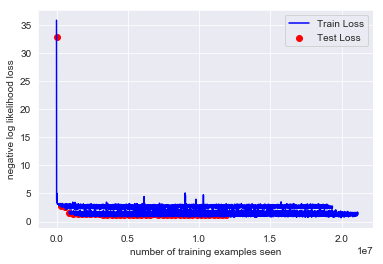

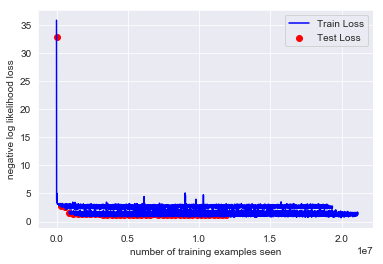

In [214]:
test_counter = [i*len(train_X) for i in range(epochs + 1)]
fig = plt.figure()
plt.plot(train_counter[:20000], train_losses[:20000], color='blue')
plt.scatter(test_counter[:20000], test_losses[:20000], color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

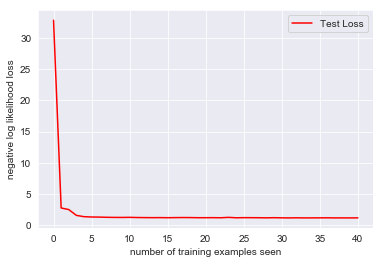

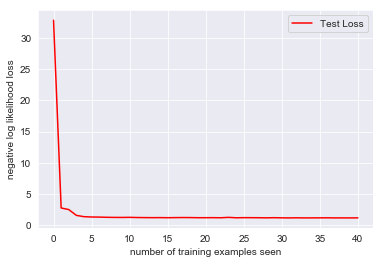

In [209]:
fig = plt.figure()
plt.plot(test_counter, test_losses, color='red')
plt.legend(['Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig


In [175]:
input_size = 784
output_size = 10

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
        self.linear_relu_stack_1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
    
        )
        self.linear_relu_stack_2 = nn.Sequential(
            #reshshape
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 26),
            nn.LogSoftmax()
        )

    def forward(self, x):
        logits = self.linear_relu_stack_1(x)
        logits1 = logits.view(-1, 128)
        logits2 = self.linear_relu_stack_2(logits1)
        return logits2
        """x = nn.ReLU(nn.max_pool2d(self.conv1(x), 2))
        x = nn.ReLU(nn.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.ReLU(self.fc1(x))
        x = nn.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)"""


    

In [176]:
epochs = 40
batch_size = 64
train_X = torch.from_numpy(train_x)
train_X_resized = train_X.unsqueeze(1).to(dtype=torch.float)

model = Model()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_Y = torch.from_numpy(train_y.values).to(dtype=torch.long)

loss_fn = nn.CrossEntropyLoss()
train_losses_2 = []
train_counter_2 = []
test_losses_2 = []
test_counter_2 = [i*len(train_x) for i in range(epochs + 1)]
log_interval = 2*batch_size

#for epoch in range(epochs):
def train(epoch):
    permutation = torch.randperm(train_X.size()[0])
    for i in range(0, train_X.size()[0], batch_size):
        optimizer.zero_grad()
        indices = permutation[i: i+batch_size]
        batch_x, batch_y = train_X_resized[indices], train_Y[indices]
        
        prediction = model(batch_x)
        loss = loss_fn(prediction, batch_y)
        loss.backward()
        optimizer.step()
        
        if i % log_interval == 0:
            """print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch+1, i, len(train_x), 100. * i / len(train_x), loss.item()))"""
            train_losses_2.append(loss.item())
            train_counter_2.append((i*64) + ((epoch-1)*len(train_x)))


In [177]:
#### write test function + printing accuracy/loss
test_X=torch.from_numpy(test_x)
test_X_resized = test_X.unsqueeze(1).to(dtype=torch.float)
test_X_resized = test_X_resized.unsqueeze(1).to(dtype=torch.float)

test_Y=torch.tensor(test_y.values)
test_losses_2=[]
test_counter_2 = [i for i in range(epochs + 1)]
def test():
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for inp, target in zip(test_X_resized, test_Y):
            output = model(inp)
            #print(output.shape, target.shape)
            test_loss += loss_fn(output, target.unsqueeze(0))
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_Y)
    test_losses_2.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( test_loss, correct, len(test_Y),100. * correct / len(test_Y)))

In [178]:
test()
for epoch in range(1, epochs + 1):
    train(epoch)
    test()


Test set: Avg. loss: 4.3085, Accuracy: 932/74490 (1%)


Test set: Avg. loss: 0.1750, Accuracy: 70906/74490 (95%)


Test set: Avg. loss: 0.1488, Accuracy: 71738/74490 (96%)


Test set: Avg. loss: 0.1398, Accuracy: 72066/74490 (97%)


Test set: Avg. loss: 0.1158, Accuracy: 72536/74490 (97%)


Test set: Avg. loss: 0.1248, Accuracy: 72455/74490 (97%)


Test set: Avg. loss: 0.1283, Accuracy: 72361/74490 (97%)


Test set: Avg. loss: 0.1457, Accuracy: 72028/74490 (97%)


Test set: Avg. loss: 0.1201, Accuracy: 72477/74490 (97%)


Test set: Avg. loss: 0.1614, Accuracy: 71841/74490 (96%)


Test set: Avg. loss: 0.1302, Accuracy: 72462/74490 (97%)


Test set: Avg. loss: 0.1313, Accuracy: 72586/74490 (97%)


Test set: Avg. loss: 0.1666, Accuracy: 72219/74490 (97%)


Test set: Avg. loss: 0.1768, Accuracy: 71662/74490 (96%)


Test set: Avg. loss: 0.1873, Accuracy: 72117/74490 (97%)


Test set: Avg. loss: 2.9335, Accuracy: 11405/74490 (15%)


Test set: Avg. loss: 2.9324, Accuracy: 11405/74490 (15%)



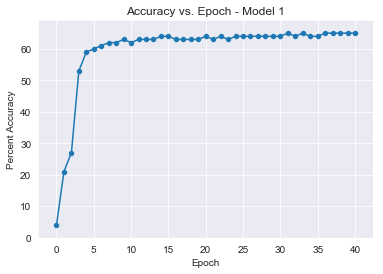

In [216]:
import seaborn as sns
test_counter = [i for i in range(0, epochs + 1)]
test_1 = [4, 21, 27, 53, 59, 60, 61, 62, 62, 63, 62, 63, 63, 63, 64, 64, 63, 63, 63, 63, 64, 63, 64, 63, 64, 64, 64, 64, 64, 64, 64, 65, 64, 65, 64, 64, 65, 65, 65, 65, 65]
test_2 = [1, 95, 96, 97, 97, 97, 97, 97, 97, 96, 97, 97, 97, 96, 97, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
sns.set_style('darkgrid')
sns.lineplot(x=test_counter, y=test_1)
sns.scatterplot(x=test_counter, y=test_1)
plt.xlabel("Epoch")
plt.ylabel("Percent Accuracy")
plt.title("Accuracy vs. Epoch - Model 1")
plt.show()

In [187]:
test_counter = [i for i in range(0, epochs + 1)]

In [190]:
len(test_1)

40

In [194]:
test_X_resized.size()

torch.Size([74490, 1, 1, 28, 28])

In [215]:
train_X.size()[0]/64

4655.625